In [202]:
# Trading Strategy for Long:
def LongPosition(seq):
    status = 0
    PriceBuy = []
    PriceSell = []
    Revenue = []
    TransactionDays = []
    temp_buyprice = -1
    temp_buyindex = -1
    tx = 0

    for i in range(len(seq)):
        if seq['Close_short'][i]> seq['Close_long'][i]:
            # signal to Buy: 
            if status != 1:
                # You do not have any position but you get the buying signal:
                # --> you shall buy one position.
                status = 1
                PriceBuy.append(seq['Open'][i+1])
                PriceSell.append(np.nan)
                TransactionDays.append(np.nan)
                temp_buyprice = seq['Open'][i+1]
                temp_buyindex = i+1
                Revenue.append(np.nan)
                tx += 1
            else: 
                # You already have a position, and you still get the buying signal:
                # --> The stock price goes up and you shall keep holding the position.
                PriceBuy.append(np.nan)
                PriceSell.append(np.nan)
                TransactionDays.append(np.nan)
                Revenue.append(np.nan)
        elif seq['Close_short'][i]< seq['Close_long'][i]:
            # signal to Sell:
            if status != 0:
                # You hold a position, but you get a signal for sell
                # --> you shall sell the position as soon as possible.
                status = 0
                PriceBuy.append(np.nan)
                PriceSell.append(seq['Open'][i+1])
                Revenue.append(seq['Open'][i+1] - temp_buyprice)
                TransactionDays.append(i+1 - temp_buyindex)
                tx += 1
                
            else: 
                # You do not have any position, and you get a signal for sell
                # --> you can ignore the selling signal.
                PriceBuy.append(np.nan)
                PriceSell.append(np.nan)
                Revenue.append(np.nan)
                TransactionDays.append(np.nan)
        else:
            # There is no clear signal. Keep waiting for buying or selling signals.
            PriceBuy.append(np.nan)
            PriceSell.append(np.nan)
            Revenue.append(np.nan)
            TransactionDays.append(np.nan)
            
    return (PriceBuy, PriceSell, Revenue, TransactionDays, tx)

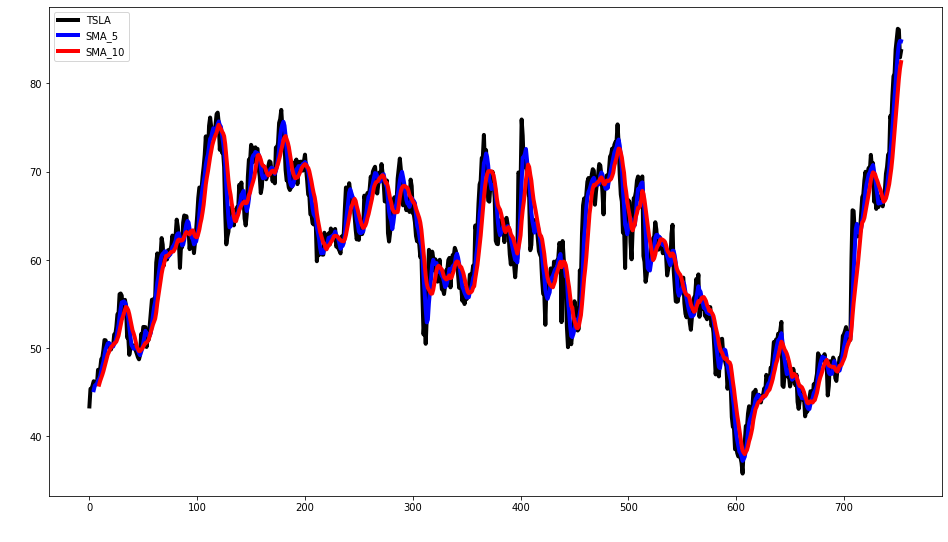

In [203]:
# Sample code for Algprithm Trading with Python:
# pip install matplotlib openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def strat(ma1, ma2):

    df = pd.read_excel('TSLA_2017_2020.xlsx')
    label_color = 'white'

    # read stock data first:

    # compute Simple Moving Average for closing price to extract the trend in time domain:
    df['Close_short'] = df['Close'].rolling(window = ma1).mean()
    df['Close_long'] = df['Close'].rolling(window = ma2).mean()

    # Visualize the closing price and SMA sequences:
    fig = plt.subplots(figsize=(16,9))
    plt.plot(df.index, df['Close'].values, color='black', label='TSLA', linewidth=4)
    plt.plot(df.index, df['Close_short'].values, color ='blue', label='SMA_%s' % ma1, linewidth=4)
    plt.plot(df.index, df['Close_long'].values, color ='red', label='SMA_%s' % ma2, linewidth=4)
    plt.legend()
    plt.xlabel('Date',fontsize=18, color=label_color)
    plt.ylabel('Close Price USD ($)',fontsize=18, color=label_color)
    return df

strat1 = strat(5, 10)


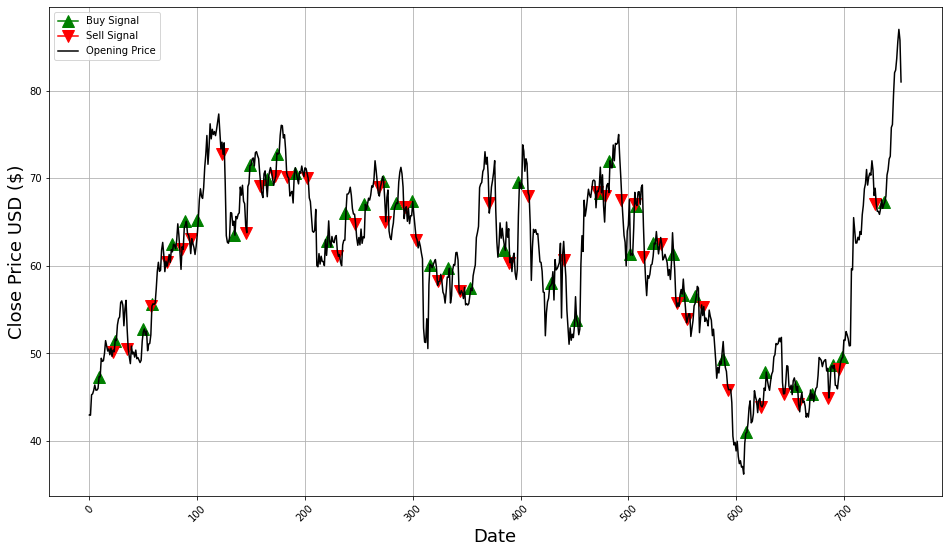

In [204]:
# Visualize the Long strategy:
def long_chart(df):
    Long = LongPosition(df)

    df['Buy Price_Long'] = Long[0]
    df['Sell Price_Long'] = Long[1]
    df['Revenue_Long'] = Long[2]
    fig = plt.subplots(figsize=(16,9))
    plt.plot(df.index, df['Buy Price_Long'].values, color ='green', label='Buy Signal', marker = '^', markersize=12)
    plt.plot(df.index, df['Sell Price_Long'].values, color ='red', label='Sell Signal', marker = 'v', markersize=12)
    plt.plot(df['Open'],  color ='black', label='Opening Price')
    plt.legend(loc='upper left')
    plt.grid()
    plt.xticks(rotation=45)
    plt.xlabel('Date',fontsize=18)
    plt.ylabel('Close Price USD ($)',fontsize=18)
    return (df['Revenue_Long'], df['Buy Price_Long'], df['Sell Price_Long'], Long[4])

strat1_long = long_chart(strat1)


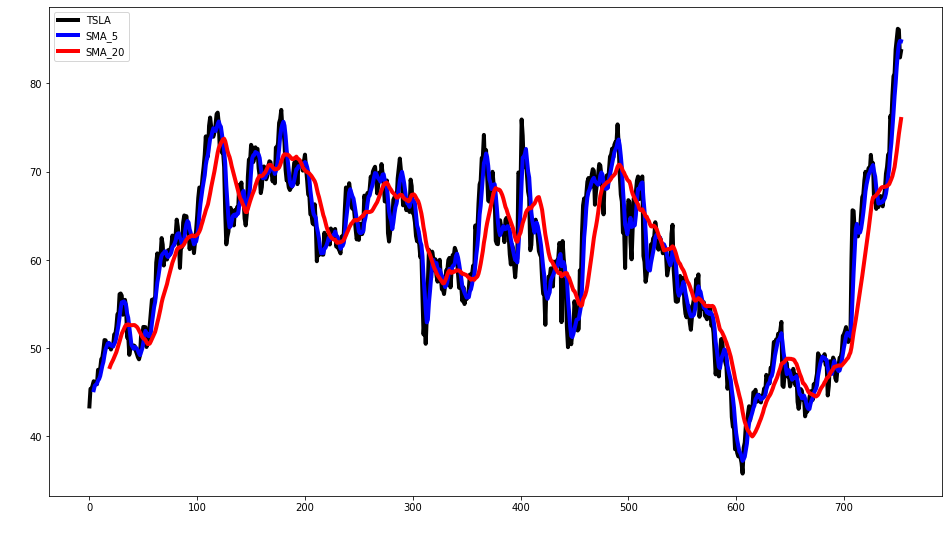

In [205]:
strat2 = strat(5, 20)

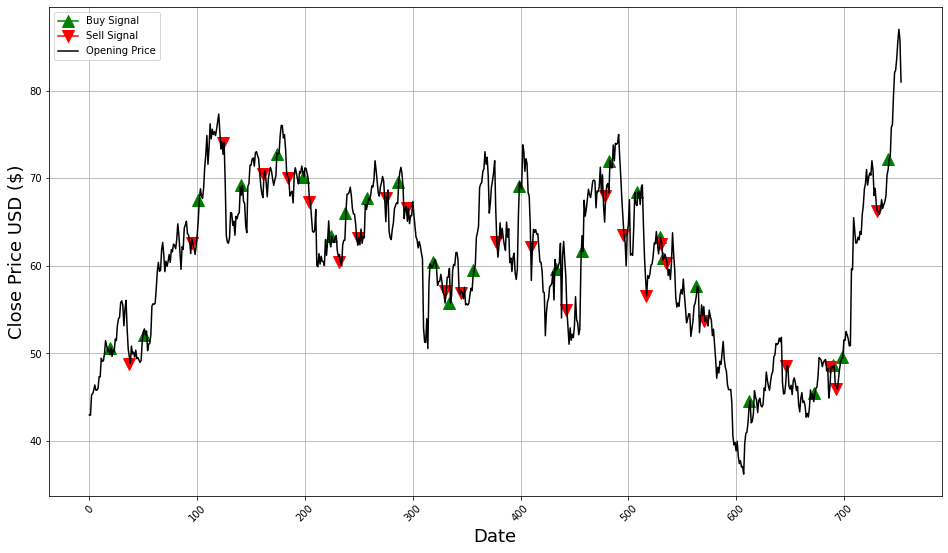

In [206]:
strat2_long = long_chart(strat2)

In [207]:
# Please report the total number of transactions and your average revenue that you have traded to Q3_b.xlsx.
def revenue(df):

    res = 0

    for v in df[~np.isnan(df)]:
        res += v

    return res


In [208]:
def tx_count(tx):
    print("transactions count: ", tx)


In [209]:
print("revenue strat 1 Ma(5, 10):", revenue(strat1_long[0]))
tx_count(strat1_long[3])

print("revenue strat 1 Ma(10, 20):", revenue(strat2_long[0]))
tx_count(strat2_long[3])

revenue strat 1 Ma(5, 10): 15.242000579833935
transactions count:  81
revenue strat 1 Ma(10, 20): -6.942008972167969
transactions count:  51
